In [53]:
!date

Mon Jul 14 04:45:59 PM EDT 2025


In [54]:
pwd

'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

### Get Files

In [55]:
import os
import numpy as np
import pandas as pd
import ants

In [56]:
import importlib

import DeepCor_utils
importlib.reload(DeepCor_utils)

import DeepCor_models
importlib.reload(DeepCor_models)

from DeepCor_utils import *
from DeepCor_models import *

numpy version: 1.20.1
sklearn version: 1.3.2
torch version: 2.4.1+cu121
AntsPy version: 0.6.1


In [106]:
# Parameters
idx=142
analysis_name = "test-things"

In [107]:
make_sublist = False

if make_sublist==True:
    nsubs = 3
    nsess = 12
    nruns = 10

    vec_sub_name = []
    vec_sub_counter = []
    vec_sess_name = []
    vec_run_name = []
    vec_run_counter = []

    for i_sub in range(1,nsubs+1):
        for i_sess in range(1,nsess+1):
            for i_run in range(1,nruns+1):
                vec_sub_name.append(f'sub-0{i_sub}')
                vec_sub_counter.append(i_sub)
                vec_sess_name.append(f'ses-things{i_sess:02d}')
                vec_run_name.append(f'run-{i_run:02d}')
                vec_run_counter.append((i_sess-1)*nruns+(i_run))

    sublist = pd.DataFrame()
    sublist['sub_name'] = vec_sub_name
    sublist['sub_counter'] = vec_sub_counter
    sublist['sess_name'] = vec_sess_name
    sublist['run_name'] = vec_run_name
    sublist['run_counter'] = vec_run_counter

    paths_epi = []
    for i in range(sublist.shape[0]):
        paths_epi.append('../Data/things/fmriprep2/{sub}/{sess}/func/{sub}_{sess}_task-things_{run}_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'.format(
            sub=sublist['sub_name'].values[i],
            sess=sublist['sess_name'].values[i],
            run=sublist['run_name'].values[i],))

    paths_anat = []
    for i in range(sublist.shape[0]):
        paths_anat.append('../Data/things/fmriprep2/{sub}/anat/{sub}_rec-pydeface_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz'.format(
            sub=sublist['sub_name'].values[i]))

    paths_anat_gm = []
    for i in range(sublist.shape[0]):
        paths_anat_gm.append('../Data/things/fmriprep2/{sub}/anat/{sub}_rec-pydeface_space-MNI152NLin2009cAsym_res-2_label-GM_probseg.nii.gz'.format(
            sub=sublist['sub_name'].values[i]))

    paths_anat_wm = []
    for i in range(sublist.shape[0]):
        paths_anat_wm.append('../Data/things/fmriprep2/{sub}/anat/{sub}_rec-pydeface_space-MNI152NLin2009cAsym_res-2_label-WM_probseg.nii.gz'.format(
            sub=sublist['sub_name'].values[i]))

    paths_anat_csf = []
    for i in range(sublist.shape[0]):
        paths_anat_csf.append('../Data/things/fmriprep2/{sub}/anat/{sub}_rec-pydeface_space-MNI152NLin2009cAsym_res-2_label-CSF_probseg.nii.gz'.format(
            sub=sublist['sub_name'].values[i]))

    paths_conf = []
    for i in range(sublist.shape[0]):
        paths_conf.append('../Data/things/fmriprep2/{sub}/{sess}/func/{sub}_{sess}_task-things_{run}_desc-confounds_timeseries.tsv'.format(
            sub=sublist['sub_name'].values[i],
            sess=sublist['sess_name'].values[i],
            run=sublist['run_name'].values[i],))

    paths_events = []
    for i in range(sublist.shape[0]):
        paths_events.append('../Data/things/ds004192/{sub}/{sess}/func/{sub}_{sess}_task-things_{run}_events.tsv'.format(
            sub=sublist['sub_name'].values[i],
            sess=sublist['sess_name'].values[i],
            run=sublist['run_name'].values[i],))


    sublist['paths_epi'] = paths_epi
    sublist['paths_anat'] = paths_anat
    sublist['paths_anat_gm'] = paths_anat_gm
    sublist['paths_anat_wm'] = paths_anat_wm
    sublist['paths_anat_csf'] = paths_anat_csf
    sublist['paths_conf'] = paths_conf
    sublist['paths_events'] = paths_events

    sublist['exist_paths_epi']=[os.path.exists(val) for val in sublist['paths_epi'].values]
    sublist['exist_paths_anat']=[os.path.exists(val) for val in sublist['paths_anat'].values]
    sublist['exist_paths_anat_gm']=[os.path.exists(val) for val in sublist['paths_anat_gm'].values]
    sublist['exist_paths_anat_wm']=[os.path.exists(val) for val in sublist['paths_anat_wm'].values]
    sublist['exist_paths_anat_csf']=[os.path.exists(val) for val in sublist['paths_anat_csf'].values]
    sublist['exist_paths_conf']=[os.path.exists(val) for val in sublist['paths_conf'].values]
    sublist['exist_paths_events']=[os.path.exists(val) for val in sublist['paths_events'].values]

    sublist.to_csv('../Data/things/sublist.csv')
else:
    sublist = pd.read_csv('../Data/things/sublist.csv')

In [108]:
# Filter only rows with all available files
check_vec = sublist[['exist_paths_epi', 'exist_paths_anat', 'exist_paths_anat_gm','exist_paths_anat_wm', 'exist_paths_anat_csf', 'exist_paths_conf','exist_paths_events']].values.mean(axis=1)==1.0
sublist = sublist.iloc[check_vec]

In [109]:
sublist.iloc[idx]

Unnamed: 0                                                            152
sub_name                                                           sub-02
sub_counter                                                             2
sess_name                                                    ses-things04
run_name                                                           run-03
run_counter                                                            33
paths_epi               ../Data/things/fmriprep2/sub-02/ses-things04/f...
paths_anat              ../Data/things/fmriprep2/sub-02/anat/sub-02_re...
paths_anat_gm           ../Data/things/fmriprep2/sub-02/anat/sub-02_re...
paths_anat_wm           ../Data/things/fmriprep2/sub-02/anat/sub-02_re...
paths_anat_csf          ../Data/things/fmriprep2/sub-02/anat/sub-02_re...
paths_conf              ../Data/things/fmriprep2/sub-02/ses-things04/f...
paths_events            ../Data/things/ds004192/sub-02/ses-things04/fu...
exist_paths_epi                       

In [110]:
s = sublist.iloc[idx]['sub_counter']
r = sublist.iloc[idx]['run_counter']
sub = sublist.iloc[idx]['sub_name']

In [111]:
epi_fn = sublist.iloc[idx]['paths_epi']
anat_fn = sublist.iloc[idx]['paths_anat']
anat_gm_fn = sublist.iloc[idx]['paths_anat_gm']
anat_wm_fn = sublist.iloc[idx]['paths_anat_wm']
anat_csf_fn = sublist.iloc[idx]['paths_anat_csf']
conf_fn = sublist.iloc[idx]['paths_conf']
events_fn = sublist.iloc[idx]['paths_events']

In [112]:
assert os.path.exists(epi_fn), 'epi_fn does not exist'
assert os.path.exists(anat_fn), 'anat_fn does not exist'
assert os.path.exists(anat_gm_fn), 'anat_gm_fn does not exist'
assert os.path.exists(anat_wm_fn), 'anat_wm_fn does not exist'
assert os.path.exists(anat_csf_fn), 'anat_csf_fn does not exist'
assert os.path.exists(conf_fn), f'conf_fn does not exist:\n{conf_fn}'

In [113]:
epi = ants.image_read(epi_fn)
anat = ants.image_read(anat_fn)
anat_gm = ants.image_read(anat_gm_fn)
anat_wm = ants.image_read(anat_wm_fn)
anat_csf = ants.image_read(anat_csf_fn)
df_conf = pd.read_csv(conf_fn,delimiter='\t')

In [114]:
## EPI parameters: Check that these are correct
nTR = epi.shape[-1]
t_r = round(epi.spacing[-1],2)
ndummy = 0

print(f'Number of scans: {nTR}')
print(f'Repetition Time: {t_r}')
print(f'Dummy scans to discard: {ndummy}')

Number of scans: 284
Repetition Time: 1.5
Dummy scans to discard: 0


In [115]:
# Directory where to save the outputs
ofdir_root = '../Data/StudyForrest/ensembles_last_CVAE'
ofdir = os.path.join(ofdir_root,analysis_name)
safe_mkdir(ofdir)
print(ofdir)

../Data/StudyForrest/ensembles_last_CVAE/test-things


## Post-training analyses

In [116]:
df_events = pd.read_csv(events_fn,delimiter='\t')
df_trial_level = pd.read_csv('../Data/things/things_categories/Misc/_images-metadata_things.tsv',delimiter='\t')
df_word_categories = pd.read_csv('../Data/things/things_categories/Misc/things_categorization_27_AA.csv')

In [117]:
cats_living = ['animal','bird','body part','fruit','insect','plant','vegetable']
cats_nonliving = ['clothing','clothing accessory','container','electronic device','furniture','home decor','kitchen appliance','kitchen tool','medical equipment','musical instrument','office supply','part of car','sports equipment','tool','toy','vehicle','weapon']
temp = np.array(['other' for _ in range(df_word_categories.shape[0])])
temp = temp.astype(np.object_)
temp[df_word_categories[cats_living].values.sum(axis=1)>0]='living'
temp[df_word_categories[cats_nonliving].values.sum(axis=1)>0]='non-living'
df_word_categories['catname']=temp

df_word_categories['is_any'] = df_word_categories[['animal', 'bird', 'body part', 'clothing', 'clothing accessory',
       'container', 'dessert', 'drink', 'electronic device', 'food', 'fruit',
       'furniture', 'home decor', 'insect', 'kitchen appliance',
       'kitchen tool', 'medical equipment', 'musical instrument',
       'office supply', 'part of car', 'plant', 'sports equipment', 'tool',
       'toy', 'vegetable', 'vehicle', 'weapon']].values.sum(axis=1)

In [118]:
print(sum(df_word_categories['catname'].values=='living'))
print(sum(df_word_categories['catname'].values=='non-living'))
print(sum(df_word_categories['catname'].values=='other'))

257
503
1094


In [119]:
trial_cats = []
for filepath in df_events['file_path'].values:
    if 'catch' in filepath:
        trial_cats.append('catch')
    elif sum(df_trial_level['image'].values==filepath)==0:
        trial_cats.append('notfound')
    else:
        word = df_trial_level[df_trial_level['image'].values==filepath]['Word'].values[0]
        df_trial_level[df_trial_level['image'].values==filepath]
        trial_cats.append(df_word_categories[df_word_categories['word'].values==word]['catname'].values[0])

In [120]:
df_events2 = df_events[['onset','duration']]
df_events2['trial_type']=trial_cats
print(df_events2['trial_type'].value_counts())

other         48
non-living    20
living        12
catch         10
notfound       2
Name: trial_type, dtype: int64


/tmp/ipykernel_560401/3055999787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events2['trial_type']=trial_cats


In [121]:
from nilearn.glm.first_level import make_first_level_design_matrix
n_scans = nTR
frame_times = (np.arange(n_scans) * t_r)
X2 = make_first_level_design_matrix(frame_times,df_events2,drift_model="polynomial",drift_order=3,hrf_model="SPM") 

In [122]:
X2

,catch,living,non-living,notfound,other,drift_1,drift_2,drift_3,constant
0.0,0.0,0.000000,0.0,0.0,0.000000,-0.500000,0.166078,-0.049471,1.0
1.5,0.0,0.000000,0.0,0.0,0.000000,-0.496466,0.162557,-0.047373,1.0
3.0,0.0,0.000000,0.0,0.0,0.000000,-0.492933,0.159061,-0.045313,1.0
4.5,0.0,0.000000,0.0,0.0,0.004486,-0.489399,0.155589,-0.043289,1.0
6.0,0.0,0.000000,0.0,0.0,0.050567,-0.485866,0.152143,-0.041302,1.0
...,...,...,...,...,...,...,...,...,...
418.5,0.0,-0.000246,0.0,0.0,0.101823,0.485866,0.152143,0.041302,1.0
420.0,0.0,-0.000119,0.0,0.0,0.060018,0.489399,0.155589,0.043289,1.0
421.5,0.0,-0.000056,0.0,0.0,0.023048,0.492933,0.159061,0.045313,1.0
423.0,0.0,0.000000,0.0,0.0,-0.000546,0.496466,0.162557,0.047373,1.0


In [123]:
# If no post-training analyses needed, leave these empty
correlation_analyses = []
contrast_analyses = []

In [124]:
# vec = [-1,-1,-1,5,-1,-1,0,0,0,0]
# print(sum(vec))
# print(len(vec))

In [125]:
# im = ants.image_read('../Misc/tools_map.nii')
# im = im.resample_image_to_target(anat)
# im.new_image_like((im.numpy()>5)*1.0).to_filename('../Misc/tools_mask_97_115_97.nii')

In [26]:
correlation_analyses.append(
    {'corr_target' : X2['living'].values,
     'filename' : os.path.join(ofdir,f'corr2living_S{s}_R{r}.nii.gz'),
     'plot' : False, 
     'ROI' : ''
    })

correlation_analyses.append(
    {'corr_target' : X2['non-living'].values,
     'filename' : os.path.join(ofdir,f'corr2nonliving_S{s}_R{r}.nii.gz'),
     'plot' : True,
     'ROI' : '../Misc/tools_mask_97_115_97.nii'
    })

contrast_analyses.append(
    {'contrast_vec' : [0,1,-1,0,0,0,0,0,0],
     'design_matrix' : X2,
     'filename' : os.path.join(ofdir,f'contrast_living_S{s}_R{r}.nii.gz'),
     'plot' : False, 
     'ROI' : ''
    })

contrast_analyses.append(
    {'contrast_vec' : [0,-1,1,0,0,0,0,0,0],
     'design_matrix' : X2,
     'filename' : os.path.join(ofdir,f'contrast_nonliving_S{s}_R{r}.nii.gz'),
     'plot' : True,
     'ROI' : '../Misc/tools_mask_97_115_97.nii'
    })

In [27]:
# Model Hyperparameters
hyperparams_cvae = {}
hyperparams_cvae['nrep'] = 20
hyperparams_cvae['epoch_num'] = 100
hyperparams_cvae['batch_size'] = 1024
hyperparams_cvae['latent_dim'] = (8,8) # Shared,Specific
hyperparams_cvae['beta'] = 0.01       
hyperparams_cvae['gamma'] = 0 # TC scaling
hyperparams_cvae['delta'] = 0 # "Denoised RONI should be zero" scaling
hyperparams_cvae['scale_MSE_GM'] = 1e3 # Scale ROI loss 
hyperparams_cvae['scale_MSE_CF'] = 1e3 # Scale RONI loss
hyperparams_cvae['scale_MSE_FG'] = 0 # "Denoised should be similar to input" scaling
# Optimizer
hyperparams_cvae['lr']=0.001
hyperparams_cvae['betas']=(0.9, 0.999)
hyperparams_cvae['eps']=1e-08

# END of user-specified parameters

In [28]:
epi,df_conf = apply_dummy(epi,df_conf,ndummy)

In [29]:
epi,df_conf = apply_frame_censoring(epi,df_conf,df_conf['framewise_displacement'].values>.9,also_nearby_voxels=True)

Censored 0.00% of voxels 0/284


In [30]:
def regress_out_confounds(epi,mask,conf_arr,do_center=True):
    from sklearn.decomposition import PCA
    from sklearn import linear_model

    nTR = epi.shape[-1]
    epi_flat = epi.numpy().reshape(-1,nTR)
    mask_idx = mask.numpy().flatten()==1
    epi_flat_masked = epi_flat[mask_idx,:]

    epi_flat_T = epi_flat_masked.transpose()
    X = conf_arr.copy()

    if do_center==True:
        std0 = epi_flat.std(axis=-1)<1e-3
        epi_flat[~std0,:] = (epi_flat[~std0,:]-epi_flat[~std0,:].mean(axis=-1)[:,np.newaxis])/epi_flat[~std0,:].std(axis=-1)[:,np.newaxis] # Z-score the data
        epi_flat[std0,:]=0

        X[np.isnan(X)]=0
        X = (X-X.mean(axis=0))/X.std(axis=0)

    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(X, epi_flat_T)
    predicted = lin_reg.predict(X)
    residuals = (epi_flat_T - predicted).T
    res = np.zeros(epi_flat.shape)
    res[mask_idx] = residuals
    epi_cleaned = epi.new_image_like(res.reshape(epi.shape))
    
    return epi_cleaned

In [31]:
#epi = regress_out_confounds(epi,(gm+cf),df_conf[['trans_x','trans_y','trans_z','rot_x','rot_y','rot_z','a_comp_cor_00','a_comp_cor_01','a_comp_cor_02','a_comp_cor_03','a_comp_cor_04']].values)
#epi = regress_out_confounds(epi,(gm+cf),df_conf[['trans_x','trans_y','trans_z','rot_x','rot_y','rot_z']].values)

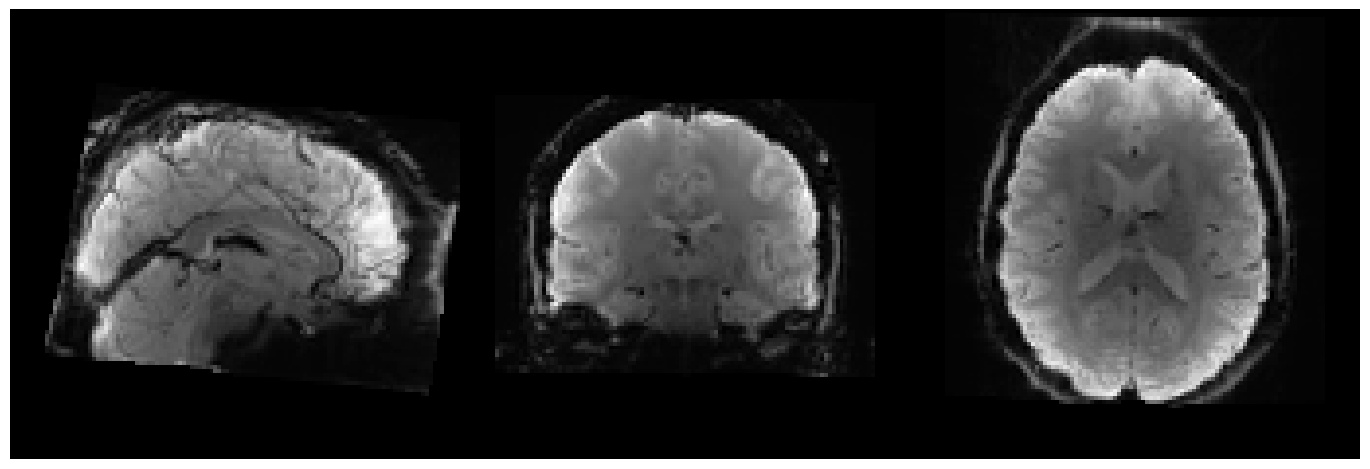

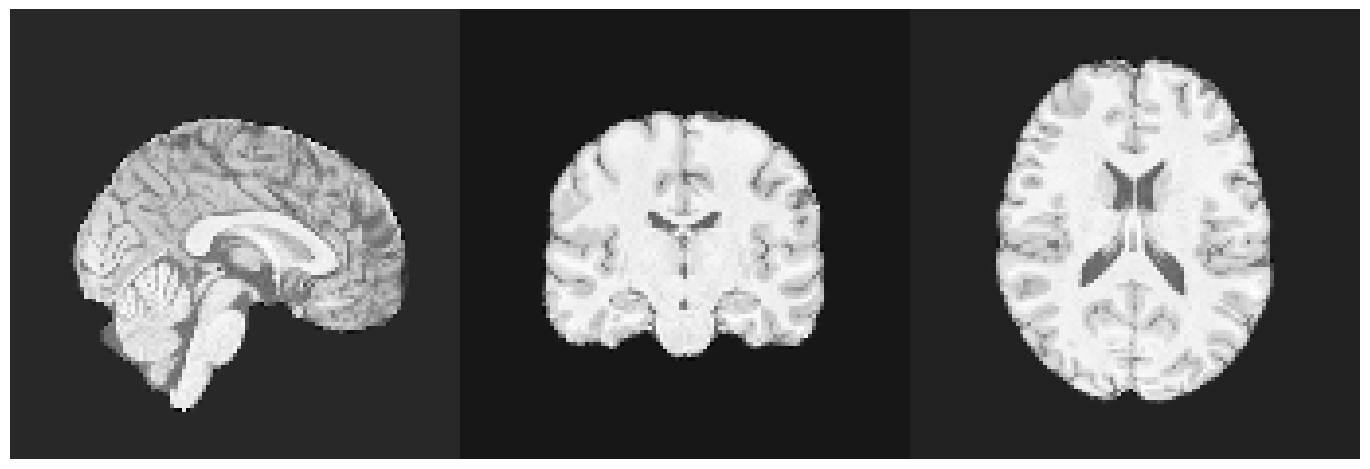

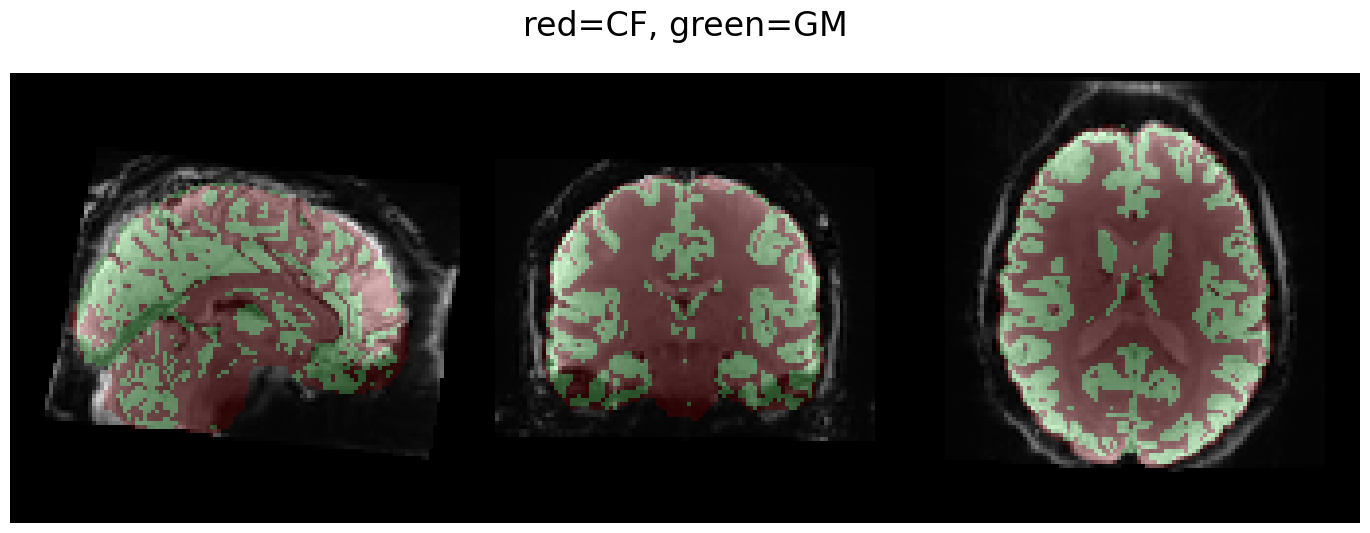

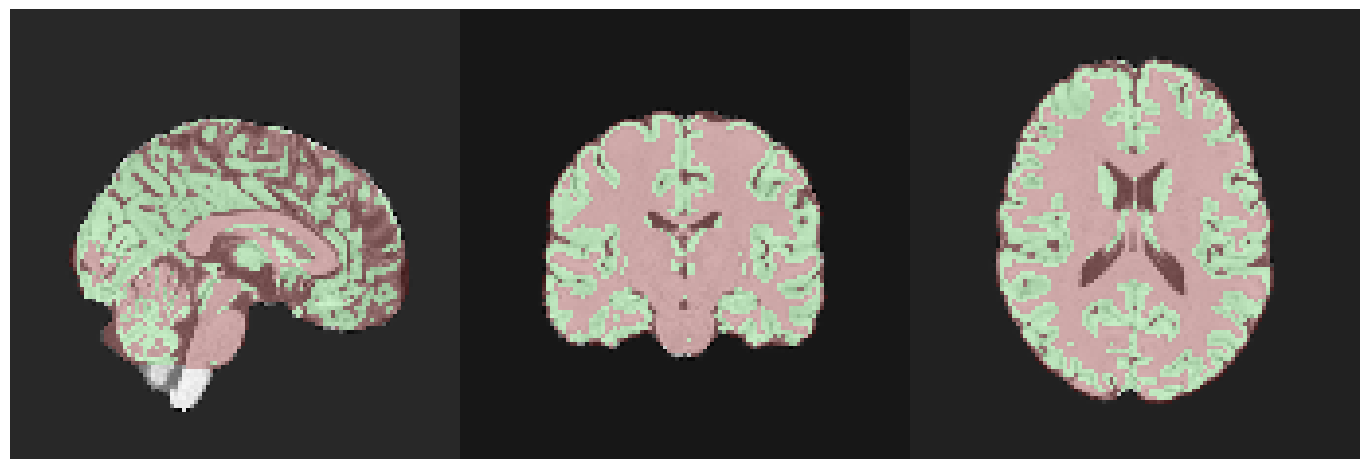

In [32]:
gm,cf = get_roi_and_roni(epi,anat,anat_gm,anat_wm,anat_csf,do_plot=True) # If using individual masks

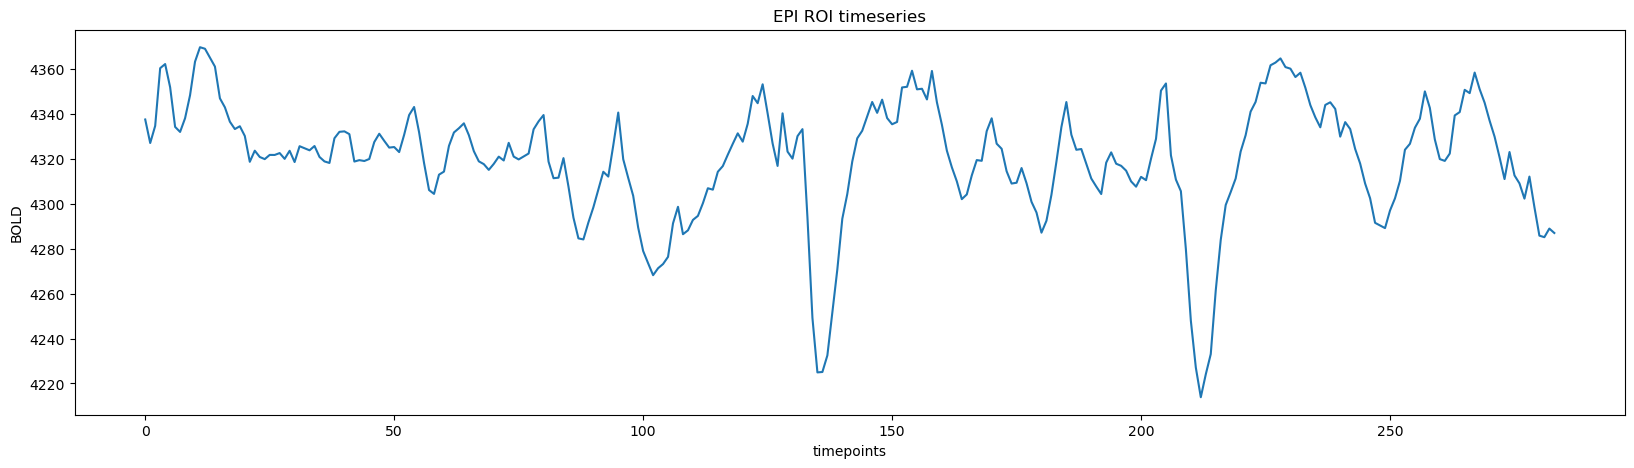

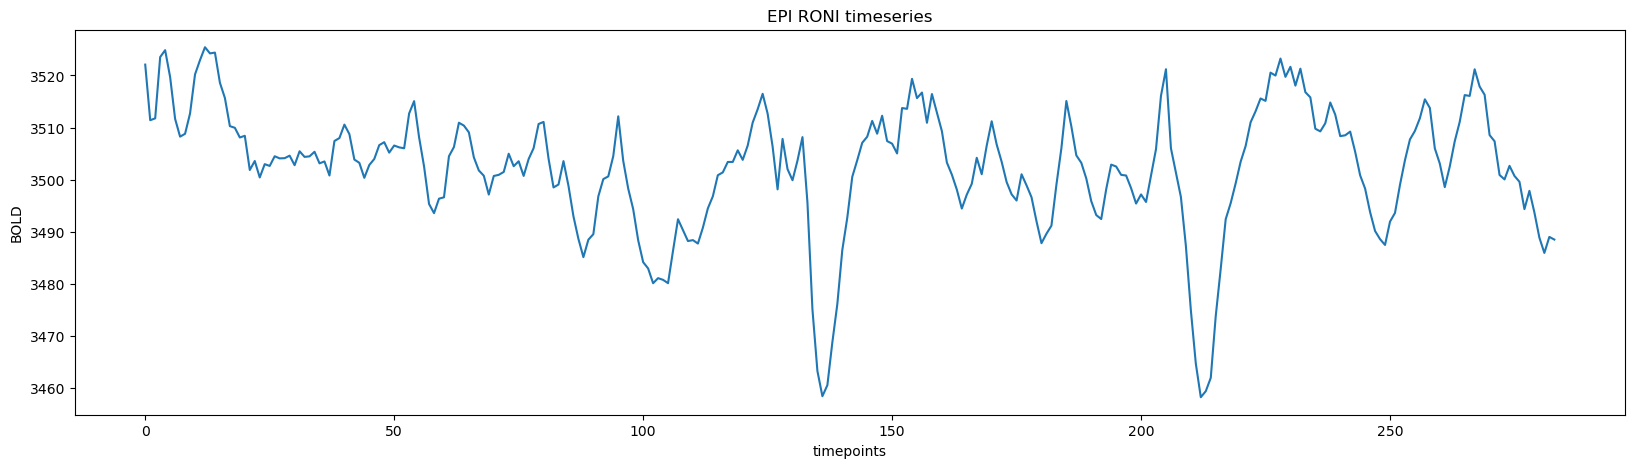

In [33]:
plot_timeseries(epi,gm,cf)

In [34]:
#epi = regress_out_confounds(epi,(gm+cf),df_conf[['trans_x','trans_y','trans_z','rot_x','rot_y','rot_z']].values)
#epi = regress_out_confounds(epi,(gm+cf),df_conf[['a_comp_cor_00','a_comp_cor_01','a_comp_cor_02','a_comp_cor_03','a_comp_cor_04']].values)
#epi = regress_out_confounds(epi,(gm+cf),df_conf[['trans_x','trans_y','trans_z','rot_x','rot_y','rot_z','a_comp_cor_00','a_comp_cor_01','a_comp_cor_02','a_comp_cor_03','a_comp_cor_04']].values)

In [35]:
use_cols = ['trans_x','trans_y','trans_z', 'rot_x','rot_y','rot_z']
#use_cols = ['X','Y','Z','RotX','RotY','RotZ']
assert np.isnan(df_conf.loc[:,use_cols].values).sum()==0,'NaNs in motion'
conf = df_conf.loc[:,use_cols].values.transpose()
conf[0:3,:] = (conf[0:3,:]-conf[0:3,:].min()) / (conf[0:3,:].max()-conf[0:3,:].min())
conf[3:,:] = (conf[3:,:]-conf[3:,:].min()) / (conf[3:,:].max()-conf[3:,:].min())
print(df_conf.shape)
df_conf.head()

(284, 315)


,global_signal,global_signal_derivative1,global_signal_power2,global_signal_derivative1_power2,csf,csf_derivative1,csf_derivative1_power2,csf_power2,white_matter,white_matter_derivative1,...,rot_z_derivative1,rot_z_power2,rot_z_derivative1_power2,motion_outlier00,motion_outlier01,motion_outlier02,motion_outlier03,motion_outlier04,motion_outlier05,motion_outlier06
0,4120.163528,NaN,1.697575e+07,NaN,4086.184993,NaN,NaN,1.669691e+07,3040.431840,NaN,...,NaN,1.074602e-06,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4108.295542,-11.867986,1.687809e+07,140.849101,4038.229781,-47.955212,2299.702367,1.630730e+07,3036.155826,-4.276014,...,0.000058,9.575092e-07,3.376307e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4107.638342,-0.657199,1.687269e+07,0.431911,4012.151557,-26.078224,680.073772,1.609736e+07,3035.269673,-0.886154,...,0.000346,3.995454e-07,1.200124e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4125.246242,17.607899,1.701766e+07,310.038119,4017.566831,5.415273,29.325184,1.614084e+07,3043.905179,8.635506,...,-0.000287,8.449764e-07,8.244364e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4132.676854,7.430612,1.707902e+07,55.213994,4016.938417,-0.628413,0.394903,1.613579e+07,3041.092788,-2.812391,...,0.000019,8.107022e-07,3.547949e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0


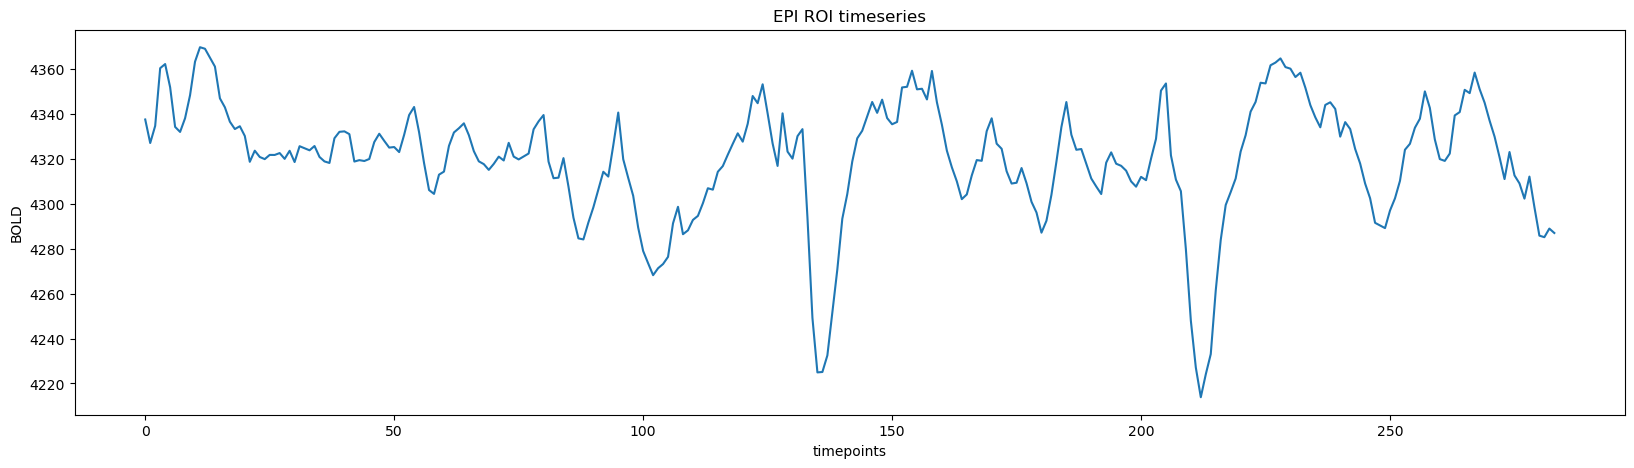

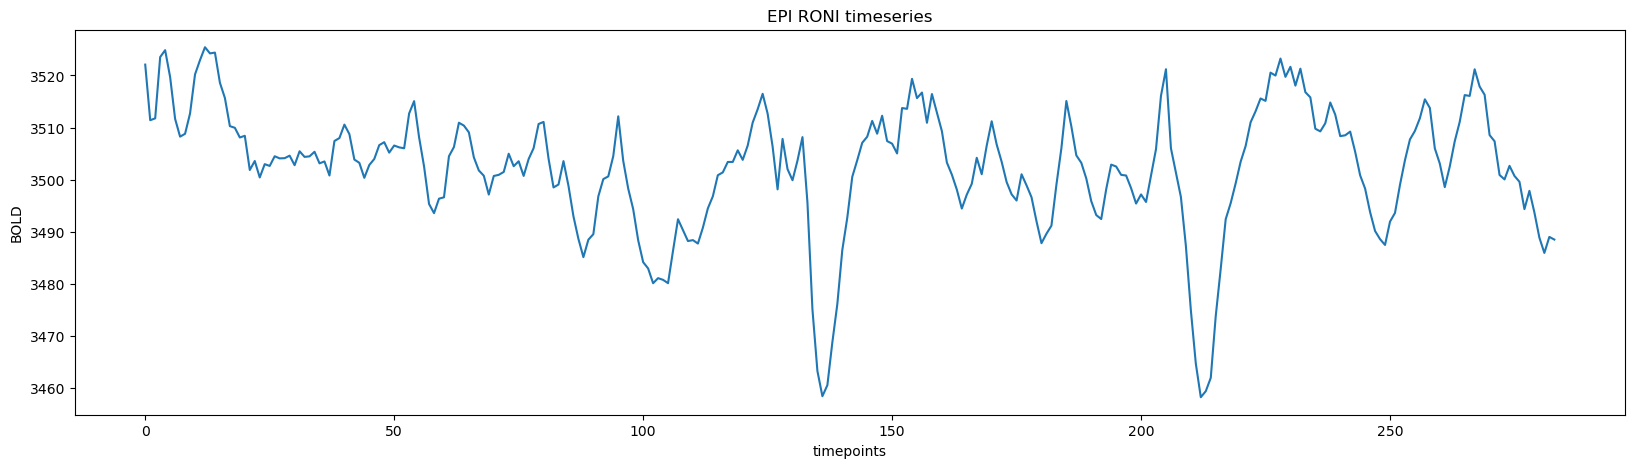

In [36]:
plot_timeseries(epi,gm,cf)

Text(0.5, 1.0, "['a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05']")

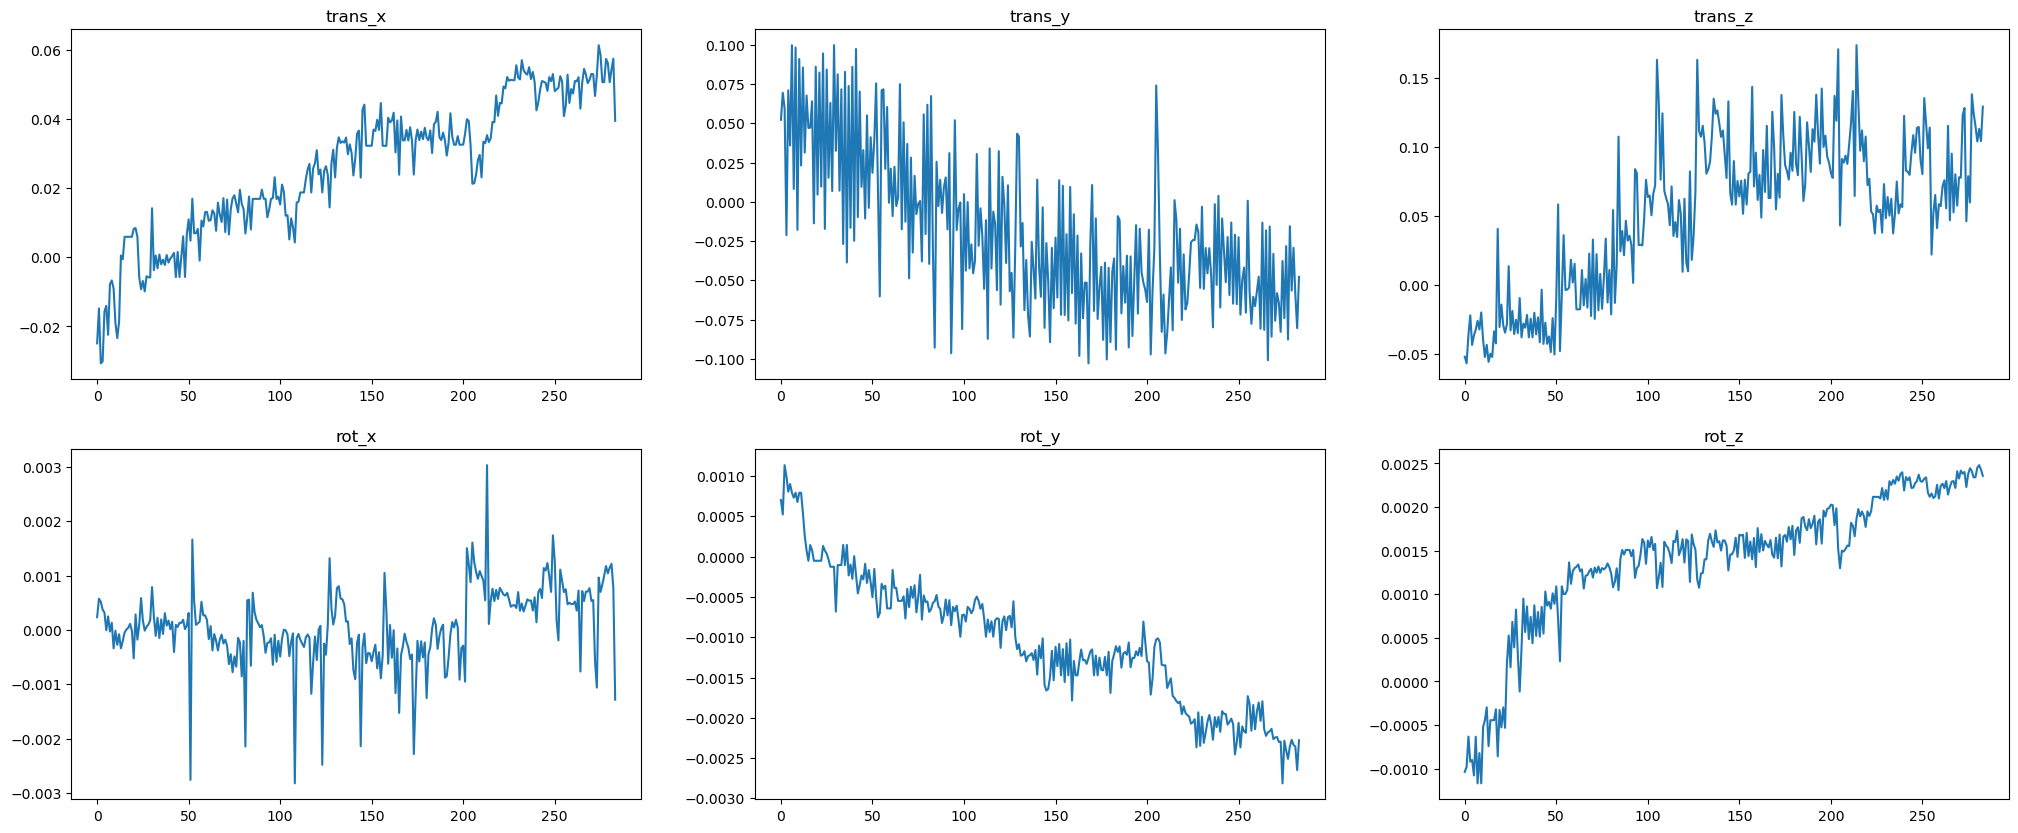

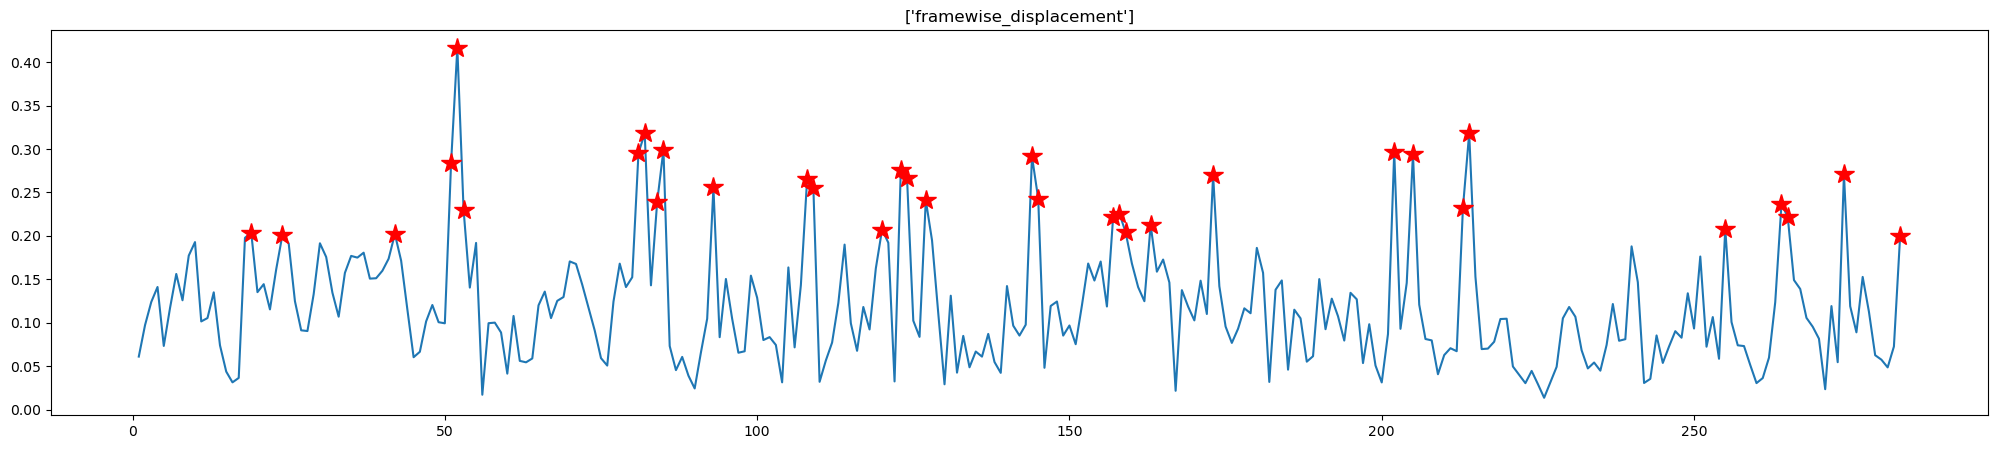

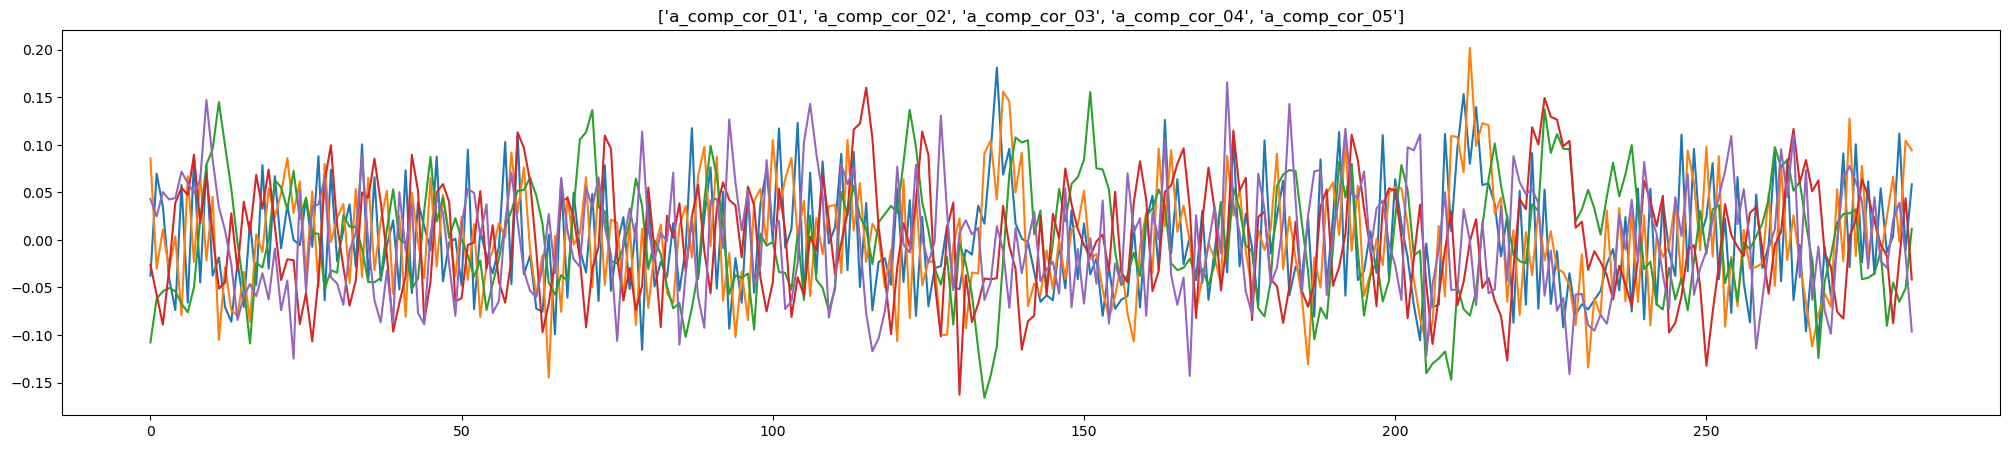

In [37]:
conf_keys_xyz_rot = ['trans_x','trans_y','trans_z','rot_x','rot_y','rot_z']
#conf_keys_xyz_rot = ['X','Y','Z','RotX','RotY','RotZ']
plt.figure(figsize=(25,10))
nrows = 2
ncols = 3
sp=0
for key in conf_keys_xyz_rot:
    sp=sp+1;plt.subplot(nrows,ncols,sp)
    plt.plot(df_conf[key].values)
    plt.title(key)
    
plt.figure(figsize=(25,5))
conf_keys_fd = ['framewise_displacement']
#conf_keys_fd = ['FramewiseDisplacement']
plt.plot(df_conf[conf_keys_fd].values)
thresh=.2
vec = (df_conf[conf_keys_fd].values>thresh)*1.0*df_conf[conf_keys_fd].values
vec[vec==0]=np.nan
plt.plot(vec,'r*',markersize=15)
plt.title(conf_keys_fd)

plt.figure(figsize=(25,5))
conf_keys_pca = ['a_comp_cor_01','a_comp_cor_02',  'a_comp_cor_03',  'a_comp_cor_04','a_comp_cor_05']
#conf_keys_pca = ['aCompCor01','aCompCor02',  'aCompCor03',  'aCompCor04','aCompCor05']
plt.plot(df_conf[conf_keys_pca].values)
plt.title(conf_keys_pca)

In [38]:
obs_list_coords,noi_list_coords,gm,cf = get_obs_noi_list_coords(epi,gm,cf)

obs_list_coords.shape: (98748, 4, 284)
noi_list_coords.shape: (132788, 4, 284)


In [39]:
#obs_list_coords,noi_list_coords,gm,cf = get_obs_noi_list_coords(epi,gm,cf)

In [40]:
# Run some sanity check, for flat voxels (not good for training) and NaNs
assert np.isnan(obs_list_coords).sum()==0, 'NaNs in obs_list_coords'
assert np.isnan(noi_list_coords).sum()==0, 'NaNs in noi_list_coords'
assert (obs_list_coords[:,0,:].std(axis=-1)<1e-3).sum()==0,'Std0 in obs_list_coords'
assert (noi_list_coords[:,0,:].std(axis=-1)<1e-3).sum()==0,'Std0 in noi_list_coords'

In [41]:
import importlib

import DeepCor_utils
importlib.reload(DeepCor_utils)

import DeepCor_models

importlib.reload(DeepCor_models)

from DeepCor_utils import *
from DeepCor_models import *

numpy version: 1.20.1
sklearn version: 1.3.2
torch version: 2.4.1+cu121
AntsPy version: 0.6.1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

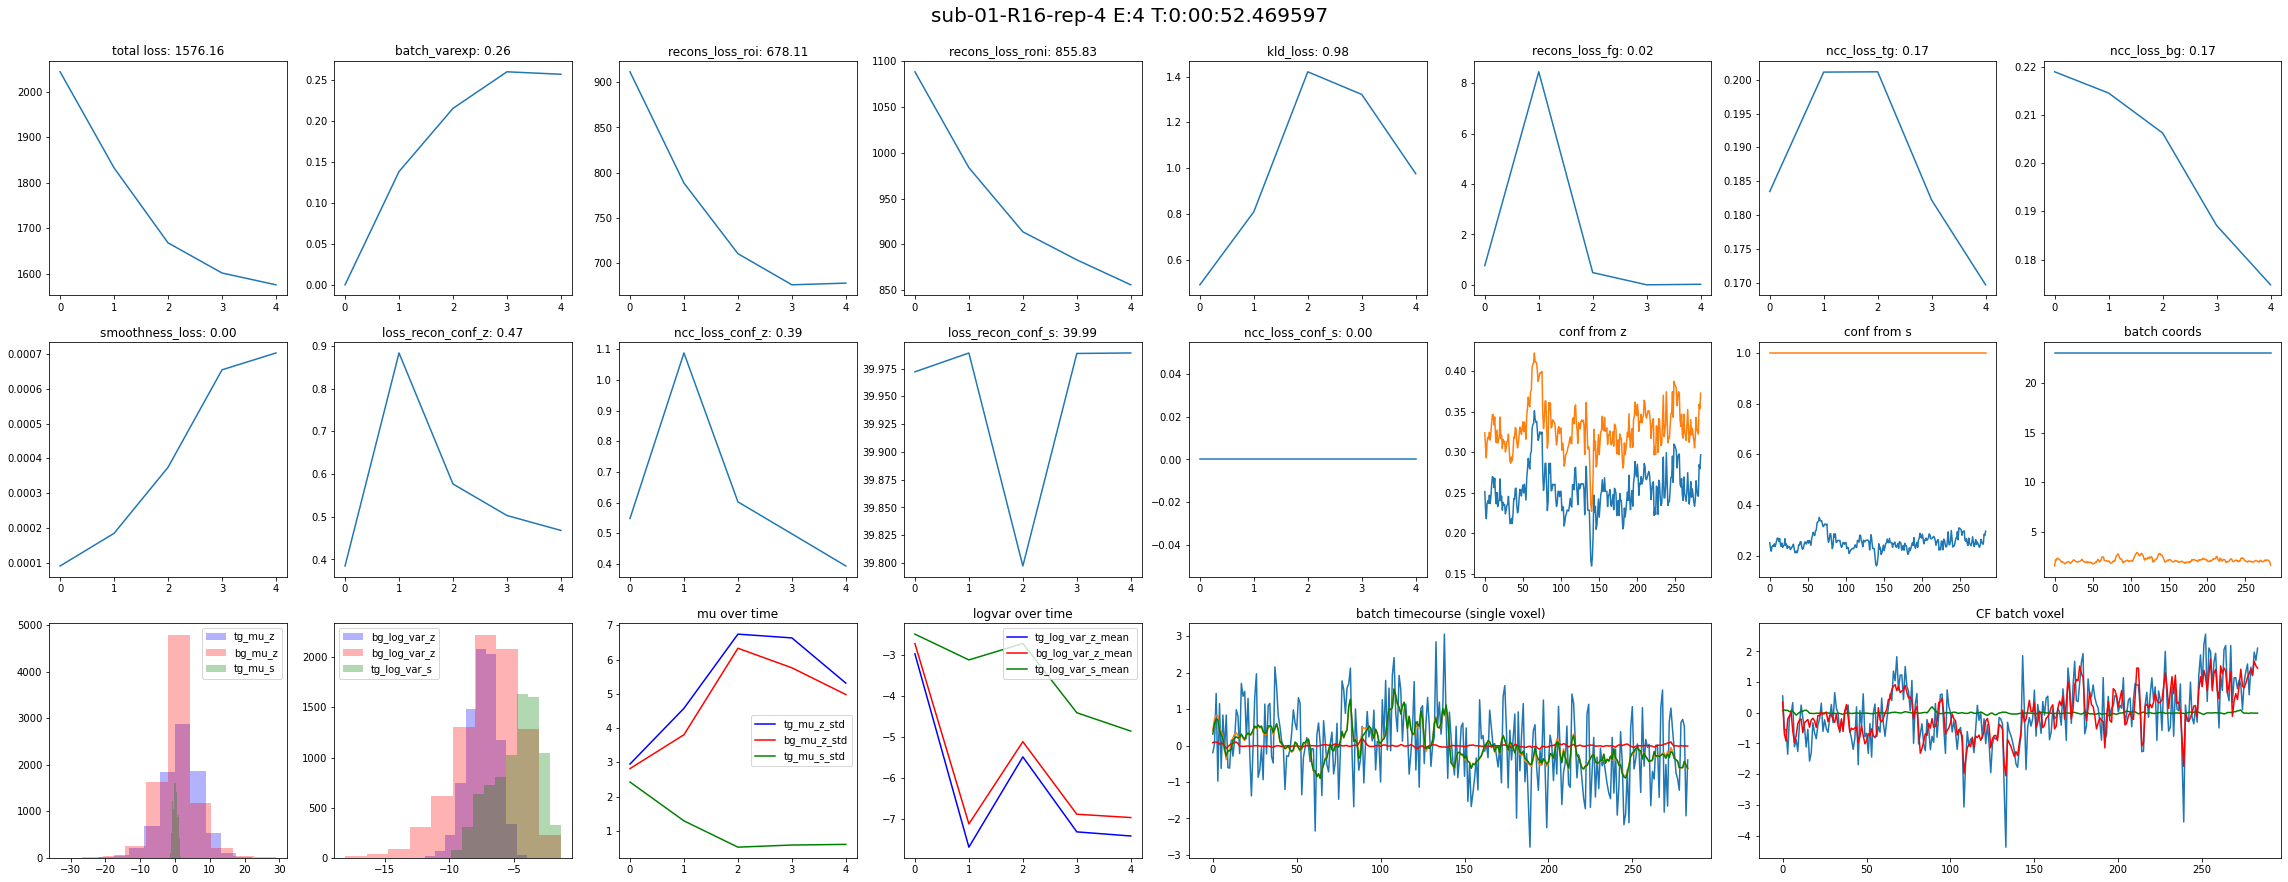

100%|██████████| 5/5 [07:42<00:00, 92.53s/it]

done training
[]


In [41]:
import traceback

nrep = hyperparams_cvae.get('nrep',20)
epoch_num = hyperparams_cvae.get('epoch_num',100)
batch_size = hyperparams_cvae.get('batch_size',512)
latent_dim = hyperparams_cvae.get('latent_dim',(8,8))
beta = hyperparams_cvae.get('beta',0.01)       
gamma = hyperparams_cvae.get('gamma',0)       
delta = hyperparams_cvae.get('delta',0)       
scale_MSE_GM = hyperparams_cvae.get('scale_MSE_GM',1e3)       
scale_MSE_CF = hyperparams_cvae.get('scale_MSE_CF',1e3)      
scale_MSE_FG = hyperparams_cvae.get('scale_MSE_FG',0) # "Denoised should be similar to input" scaling
lr = hyperparams_cvae.get('lr',0.001)

print(f'nrep: {nrep}')
print(f'epoch_num: {epoch_num}')
print(f'batch_size: {batch_size}')
print(f'latent_dim: {latent_dim}')
print(f'beta: {beta}')
print(f'gamma: {gamma}')
print(f'delta: {delta}')
print(f'scale_MSE_GM: {scale_MSE_GM}')
print(f'scale_MSE_CF: {scale_MSE_CF}')
print(f'scale_MSE_FG: {scale_MSE_FG}')
print(f'lr: {lr}')

train_inputs_coords = TrainDataset(obs_list_coords,noi_list_coords)
train_in_coords = torch.utils.data.DataLoader(train_inputs_coords, batch_size=batch_size,shuffle=True, num_workers=1,drop_last=True)

global device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'device is {device}')
Tensor = TypeVar('torch.tensor')
conf_batch = torch.tensor(np.array([conf for _ in range(batch_size)])).to(device)

keys = ['l', 'kld_loss', 'recons_loss_roi', 'recons_loss_roni',
       'loss_recon_conf_s', 'loss_recon_conf_z', 'ncc_loss_tg',
       'ncc_loss_bg', 'ncc_loss_conf_s', 'ncc_loss_conf_z',
       'smoothness_loss', 'recons_loss_fg',  'batch_varexp',
        'tg_mu_z', 'tg_log_var_z', 'tg_mu_s', 'tg_log_var_s',
        'tg_z', 'tg_s', 'bg_log_var_z', 'bg_mu_z',
        'tg_log_var_z_mean','bg_log_var_z_mean','tg_log_var_s_mean',
        'tg_mu_z_std','bg_mu_z_std','tg_mu_s_std','batch_signal',
        'batch_noise','batch_in','batch_out','batch_varexp',
        'confounds_pred_z','confounds_pred_s',]


track = init_track(keys)
errors = []

for rep in tqdm(range(nrep)):
    try:
        track = init_track(keys)
        track['sub'] = sub
        track['s'] = s
        track['r'] = r
        track['ofdir'] = ofdir
        track['conf'] = conf
        track['rep'] = rep
        
        track_ofn = os.path.join(ofdir,f'track_S{s}_R{r}_rep_{rep}.pickle')
        model_ofn = os.path.join(ofdir,f'model_S{s}_R{r}_rep_{rep}.pickle')
        
        model = cVAE(conf_batch,4,nTR,latent_dim, beta=beta, gamma=gamma,delta=delta,scale_MSE_GM=scale_MSE_GM,scale_MSE_CF=scale_MSE_CF,scale_MSE_FG=scale_MSE_FG,freq_exp=0,freq_scale=0,do_disentangle=True)
        model.to(device)
        optimizer = optim.AdamW(model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08)
        
        for epoch in range(epoch_num):  # loop over the dataset multiple times    
            model.train()
            dataloader_iter_in = iter(train_in_coords)
            track['epoch'] = epoch
            for i in range(len(train_in_coords)):
                optimizer.zero_grad()
                inputs_gm,inputs_cf = next(dataloader_iter_in)

                inputs_gm = inputs_gm.float().to(device)
                inputs_cf = inputs_cf.float().to(device)

                [outputs_gm, inputs_gm, tg_mu_z, tg_log_var_z, tg_mu_s, tg_log_var_s,tg_z,tg_s] = model.forward_tg(inputs_gm)
                [outputs_cf, inputs_cf, bg_mu_z, bg_log_var_z] = model.forward_bg(inputs_cf)

                loss = model.loss_function(outputs_gm, inputs_gm, tg_mu_z, tg_log_var_z, tg_mu_s, tg_log_var_s,tg_z,tg_s, outputs_cf, inputs_cf, bg_mu_z, bg_log_var_z)

                if np.isnan(loss['loss'].detach().cpu().numpy()): raise ValueError(f'{rep}|{epoch}|{i}: loss is NaN') # If loss is NaNs, abort training and move on to the next repetition
                    
                loss['loss'].backward() # Do a backward pass
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)  # Prevent gradient explosion
                optimizer.step()
                
            track = update_track(track,model,inputs_gm,inputs_cf)
        
            show_bashboard(track,single_fig=True)
            
        save_model(model_ofn,model,optimizer,epoch,loss)
        save_track(track_ofn,track)
        save_brain_signals(model,train_inputs_coords,epi,gm,ofn=os.path.join(ofdir,f'signal_S{s}_R{r}_rep_{rep}.nii.gz'),batch_size=512,kind='FG')
        save_brain_signals(model,train_inputs_coords,epi,gm,ofn=os.path.join(ofdir,f'recon_S{s}_R{r}_rep_{rep}.nii.gz'),batch_size=512,kind='TG') # Optional to save reconstructions
        save_brain_signals(model,train_inputs_coords,epi,gm,ofn=os.path.join(ofdir,f'noise_S{s}_R{r}_rep_{rep}.nii.gz'),batch_size=512,kind='BG') # Optional to save noise estimates       
                            
    except:
        errors.append(f'{rep}|{epoch}|{i}: loss is NaN')
        traceback.print_exc()
print('done training')
print(errors)

In [45]:
def delete_files(file_list):
    import os
    for file_path in file_list:
        try:
            os.remove(file_path)
            print(f"Deleted: {file_path}")
        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")

In [42]:
signal_files = [os.path.join(ofdir,f) for f in os.listdir(ofdir) if all((f.startswith(f'signal_S{s}_R{r}_rep_'),f.endswith('.nii.gz')))]
track_files = [os.path.join(ofdir,f) for f in os.listdir(ofdir) if all((f.startswith(f'track_S{s}_R{r}_rep_'),f.endswith('.pickle')))] 
signal_files.sort()
track_files.sort()
print('Ensemble of {} repetitions'.format(len(signal_files)))

Ensemble of 5 repetitions


In [43]:
signals_averaged = average_signal_ensemble(signal_files,os.path.join(ofdir,f'signal_S{s}_R{r}_avg.nii.gz'))

100%|██████████| 5/5 [00:26<00:00,  5.33s/it]


signals averaged: 5


In [44]:
array_to_brain(obs_list_coords[:,0,:],epi,gm,os.path.join(ofdir,f'preproc_S{s}_R{r}.nii.gz'),inv_z_score=True,return_img=False)

In [45]:
compcor = calc_and_save_compcor(epi,gm,cf,os.path.join(ofdir,f'compcor_S{s}_R{r}.nii.gz'),n_components=5,return_img=True)

In [44]:
signal_files

['../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-exp-v1/signal_S1_R1_rep_0.nii.gz',
 '../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-exp-v1/signal_S1_R1_rep_1.nii.gz',
 '../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-exp-v1/signal_S1_R1_rep_2.nii.gz',
 '../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-exp-v1/signal_S1_R1_rep_3.nii.gz',
 '../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-exp-v1/signal_S1_R1_rep_4.nii.gz']

/home/aglinska/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


saved as: ../Data/StudyForrest/ensembles_last_CVAE/test-things/corr2living_S1_R16_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/test-things/corr2living_S1_R16_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/test-things/corr2living_S1_R16_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/test-things/corr2nonliving_S1_R16_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/test-things/corr2nonliving_S1_R16_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/test-things/corr2nonliving_S1_R16_deepcor.nii.gz


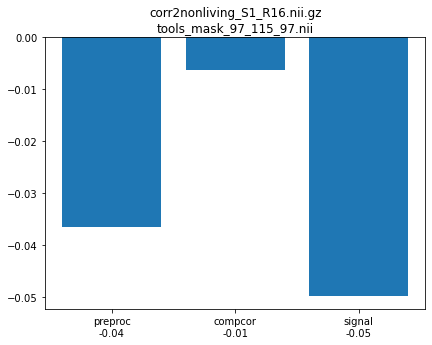

In [46]:
for analysis_spec in correlation_analyses:
    run_correlation_analysis_from_spec(analysis_spec,epi,compcor,signals_averaged,gm)

saved as: ../Data/StudyForrest/ensembles_last_CVAE/test-things/contrast_living_S1_R16_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/test-things/contrast_living_S1_R16_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/test-things/contrast_living_S1_R16_deepcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/test-things/contrast_nonliving_S1_R16_preproc.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/test-things/contrast_nonliving_S1_R16_compcor.nii.gz
saved as: ../Data/StudyForrest/ensembles_last_CVAE/test-things/contrast_nonliving_S1_R16_deepcor.nii.gz


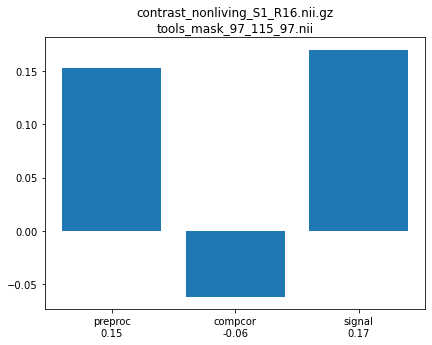

In [47]:
for analysis_spec in contrast_analyses:
    run_contrast_analysis_from_spec(analysis_spec,epi,compcor,signals_averaged,gm)

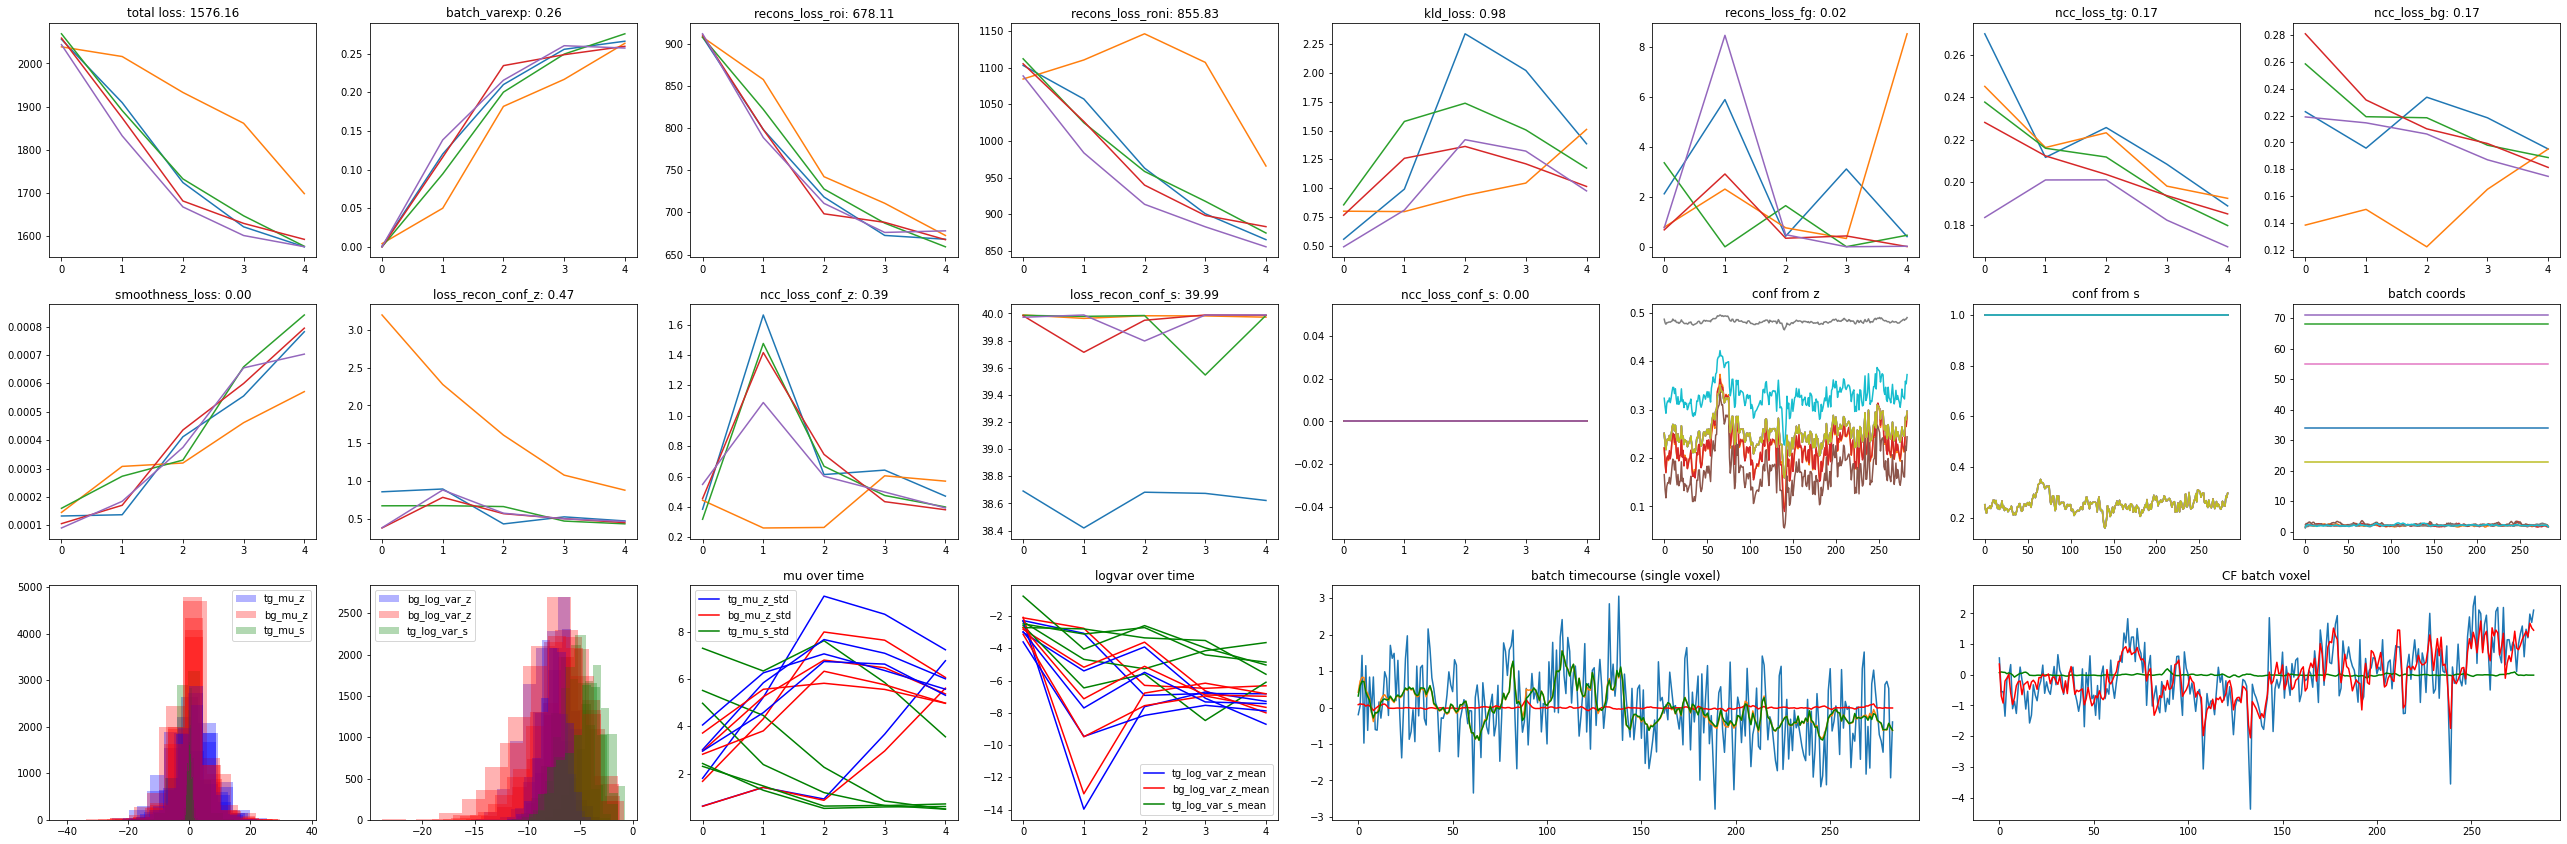

In [48]:
tracks = [load_pickle(track_file) for track_file in track_files]
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(5*9,5*5))
for track in tracks:
    try:
        show_bashboard(track,single_fig=False)
    except:
        print('bad track')

In [49]:
!date

Mon Jul  7 02:12:23 PM EDT 2025


In [47]:
delete_files(signal_files)

File not found: ../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-exp-v1/signal_S1_R1_rep_0.nii.gz
File not found: ../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-exp-v1/signal_S1_R1_rep_1.nii.gz
File not found: ../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-exp-v1/signal_S1_R1_rep_2.nii.gz
File not found: ../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-exp-v1/signal_S1_R1_rep_3.nii.gz
File not found: ../Data/StudyForrest/ensembles_last_CVAE/refactored-THINGS-exp-v1/signal_S1_R1_rep_4.nii.gz
